In [2]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv("survey_results_public.csv")

In [3]:
# display the first 5 rows
results.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [6]:
##
# Clean dataframe
##


# keep the following columns: Country, Education Level, Years of Exp, Employment, Converted Composition (to USD)
results = results[["Country", "EdLevel", "YearsCodePro", "Employment", "Salary"]]
# results = results.rename({"ConvertedCompYearly" : "Salary"}, axis = 1)
results.head()
# only keeping the info in these 5 columns since we don't want to bother the user with too much data

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [7]:
# drop all the datapoints where Salary is null

results = results[results["Salary"].notnull()]
results.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [8]:
# take a look at the stats for our data

results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [9]:
# drop all the data that doesn't have data
results = results.dropna()
results.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [10]:
# drop all non-full time data
results = results[results["Employment"] == "Employed full-time"]
# we don't need this column since all data on this column is the same
results = results.drop("Employment", axis=1)
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [11]:
results['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [12]:
# function to limit the values in a category
def limit_categories(category, limit):
    category_map = {}
    for i in range(len(category)):
        if category.values[i] >= limit:
            category_map[category.index[i]] = category.index[i]
        else:
            category_map[category.index[i]] = 'Not Enough Data'
    return category_map

In [13]:
# only include countries with over 350 datapoints
country_map = limit_categories(results.Country.value_counts(), 350)
results['Country'] = results['Country'].map(country_map)
results.Country.value_counts()

Not Enough Data                                         9962
United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
France                                                  1396
Brazil                                                  1340
Spain                                                    890
Netherlands                                              835
Australia                                                825
Poland                                                   775
Italy                                                    756
Russian Federation                                       741
Sweden                                                   735
Turkey                                                   458
Switzerland             

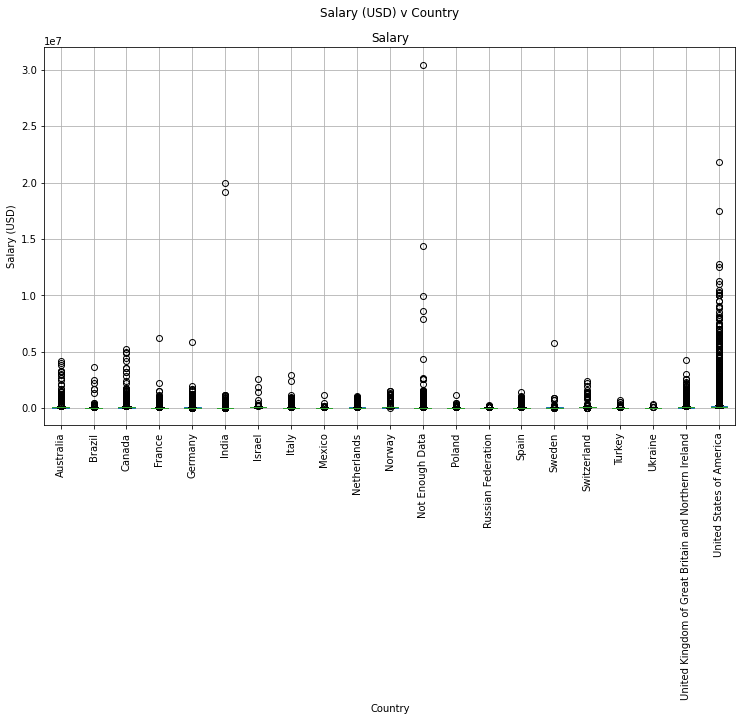

In [14]:
# plot a salary against country to inspect the salary range
fig, ax = plt.subplots(1,1, figsize=(12,7))
results.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD) v Country')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=90)
plt.show()

In [15]:
# remove outliers and unused data
results = results[results["Salary"] <= 300000]
results = results[results["Salary"] >= 15000]
results = results[results["Country"] != "Not Enought Data"]

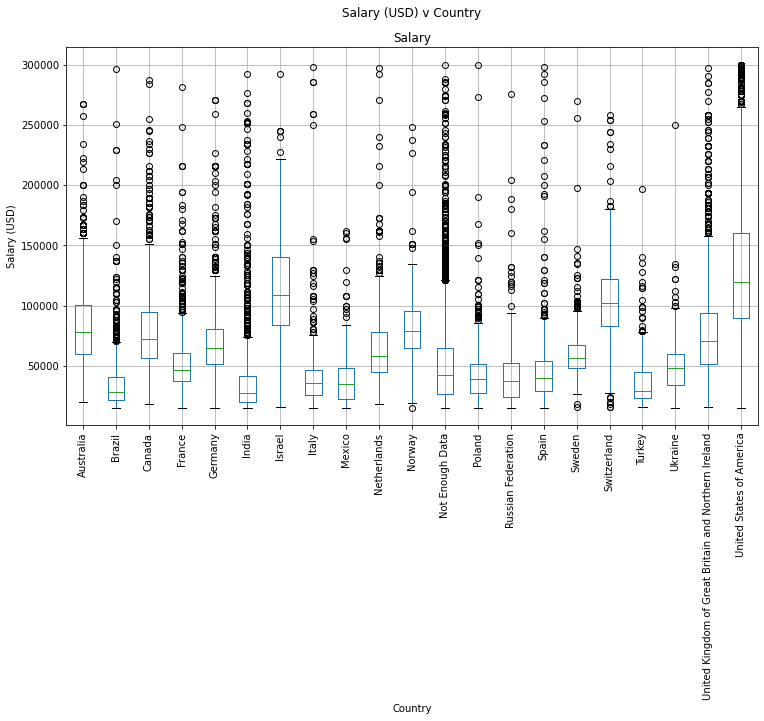

In [16]:
# plot a salary against country to inspect the salary range
fig, ax = plt.subplots(1,1, figsize=(12,7))
results.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD) v Country')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=90)
plt.show()

In [17]:
# next clean years of professional experience
# inspect all the values we have
results["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '1', '12', '8', '17', '14', '26', '34', '11', '25',
       '24', '7', '22', '13', '9', '20', '23', '39', '27', '35', '30',
       '19', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [18]:
# turn everything to a float
def clean_years_of_exp(x):
    if x == "More than 50 years":
        return 51
    if x == "Less than 1 year":
        return 0.5
    return float(x)

results['YearsCodePro'] = results['YearsCodePro'].apply(clean_years_of_exp)

In [19]:
# next clean educational level
# inspect all the values we have
results["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [20]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

results['EdLevel'] = results['EdLevel'].apply(clean_education)

In [21]:
# transform data to something the machine can understand
from sklearn.preprocessing import LabelEncoder

In [22]:
education_encoder = LabelEncoder()
results['EdLevel'] = education_encoder.fit_transform(results['EdLevel'])
results["EdLevel"].unique()

array([2, 0, 1, 3])

In [23]:
country_encoder = LabelEncoder()
results['Country'] = country_encoder.fit_transform(results['Country'])
results["Country"].unique()

array([15, 14,  4, 17,  2,  3, 16, 19, 13,  6, 18, 20,  1, 11,  7,  9, 12,
        0,  5, 10,  8])

In [24]:
## Time to train data
# split into features (everything else) and label (salary)
X = results.drop("Salary", axis=1)
y = results["Salary"]

In [25]:
# regression : predict a number rather than a category (regression not classification)
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
# fit the data
linear_reg.fit(X, y.values)

LinearRegression()

In [32]:
# predict new values
salary_pred = linear_reg.predict(X)

In [33]:
# determine how good our model performed
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, salary_pred))

In [38]:
# our model is off by $44K
print("${:,.02f}".format(error))

$43,999.54


In [35]:
# since the error is pretty high for the linear regression model, we're gonna try a different model
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [37]:
salary_pred = dec_tree_reg.predict(X)

In [40]:
error = np.sqrt(mean_squared_error(y, salary_pred))
print("${:,.02f}".format(error))

$33,973.51


In [41]:
# still pretty high so we're trying a new model
# this tries multiple descision trees into a forest
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [42]:
salary_pred = random_forest_reg.predict(X)

In [43]:
error = np.sqrt(mean_squared_error(y, salary_pred))
print("${:,.02f}".format(error))

$34,044.29


In [44]:
# to determine the best model with the best parameters, use GridSearchCV
from sklearn.model_selection import GridSearchCV

# values for max depth paramter
max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
grid_search.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [45]:
regressor = grid_search.best_estimator_

regressor.fit(X, y.values)
salary_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, salary_pred))
print("${:,.02f}".format(error))

$34,842.90


In [46]:
# use pickle to save our model before we can use it in the web app
import pickle

In [49]:
data = {"model": regressor, "country_encoder": country_encoder, "education_encoder": education_encoder}
with open('salary_pred_.pkl', 'wb') as file:
    pickle.dump(data, file)

In [50]:
# check if it saved
with open('salary_pred_.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
country_encoder = data["country_encoder"]
education_encoder = data["education_encoder"]

In [54]:
### TEST
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 1 ]])
X

array([['United States of America', 'Master’s degree', '1']], dtype='<U24')

In [55]:
X[:, 0] = country_encoder.transform(X[:,0])
X[:, 1] = education_encoder.transform(X[:,1])
X = X.astype(float)
X

array([[20.,  2.,  1.]])

In [56]:
salary_pred = regressor.predict(X)
salary_pred

C:\Users\j1996\miniconda3\envs\capstone\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([106970.45454545])

In [1]:
results.Country.value_counts()

NameError: name 'results' is not defined